# Importowanie bibliotek

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from hax.utils.statistics import Statistics
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 100

## Pobranie danych

In [8]:
path = "statistics\\FINAL_REDALDO_VS_RANDOM_BLUESSI"
# path = "statistics\\FINAL_BLUESSI_VS_LEARNED_REDALDO"
experiences, actorLosses, criticLosses = Statistics.load(path)

print(len(experiences))
print(len(criticLosses))
print(len(actorLosses))

3666944
79699
79699


# Wykresy

366694.4


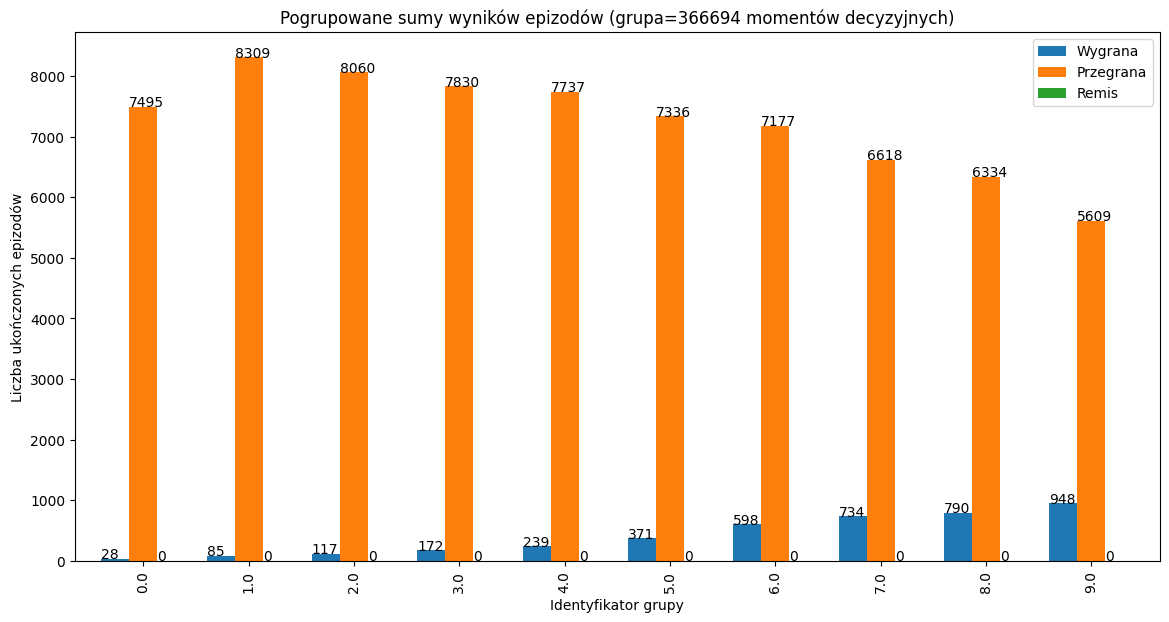

In [9]:
groups = 10
groupSize = experiences.shape[0] / groups
print(groupSize)
groupedMemories = experiences.groupby(experiences.index // groupSize).sum()
mems = groupedMemories[["win", "lose", "draw"]].plot.bar(width=0.8, xlabel="Identyfikator grupy", ylabel="Liczba ukończonych epizodów", title=f"Pogrupowane sumy wyników epizodów (grupa={round(groupSize)} momentów decyzyjnych)")
for i, p in enumerate(mems.patches):
    mems.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 5))

legend = mems.legend()
legend.get_texts()[0].set_text('Wygrana')
legend.get_texts()[1].set_text('Przegrana')
legend.get_texts()[2].set_text('Remis')

# 10,41 | 9,85 | 8,96 | 8,92 | 7,45 | 7,16 | 6,24 | 5,91 | 


<AxesSubplot:title={'center':'Błąd sieci krytyka'}, xlabel='Identifikator sesji uczenia'>

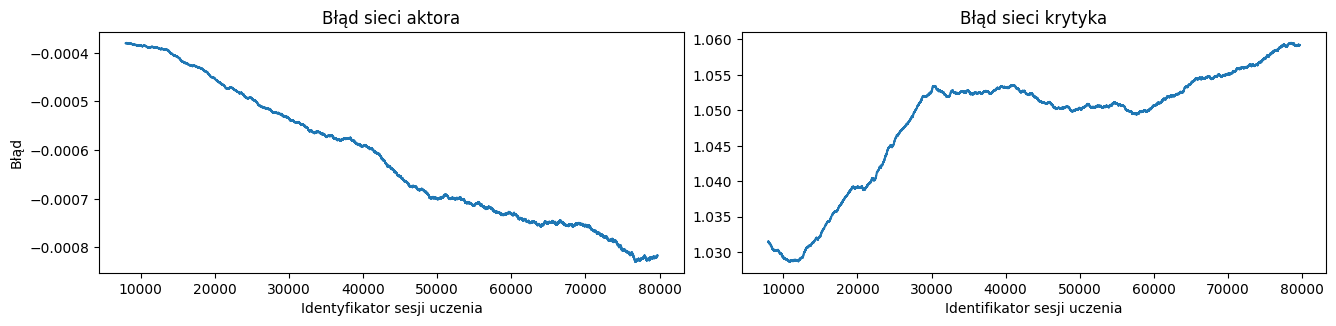

In [10]:
dataA = actorLosses["loss"]
dataC = criticLosses["loss"]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(13,3))
fig.tight_layout()
dataA.rolling(window=len(dataA)//10).mean().plot(y="loss", ax=axes[0], title="Błąd sieci aktora", xlabel="Identyfikator sesji uczenia", ylabel="Błąd")
dataC.rolling(window=len(dataC)//10).mean().plot(y="loss", ax=axes[1], title="Błąd sieci krytyka", xlabel="Identifikator sesji uczenia")


ballGateTraj   -1.247865
toBallTraj     -0.077378
dtype: float64


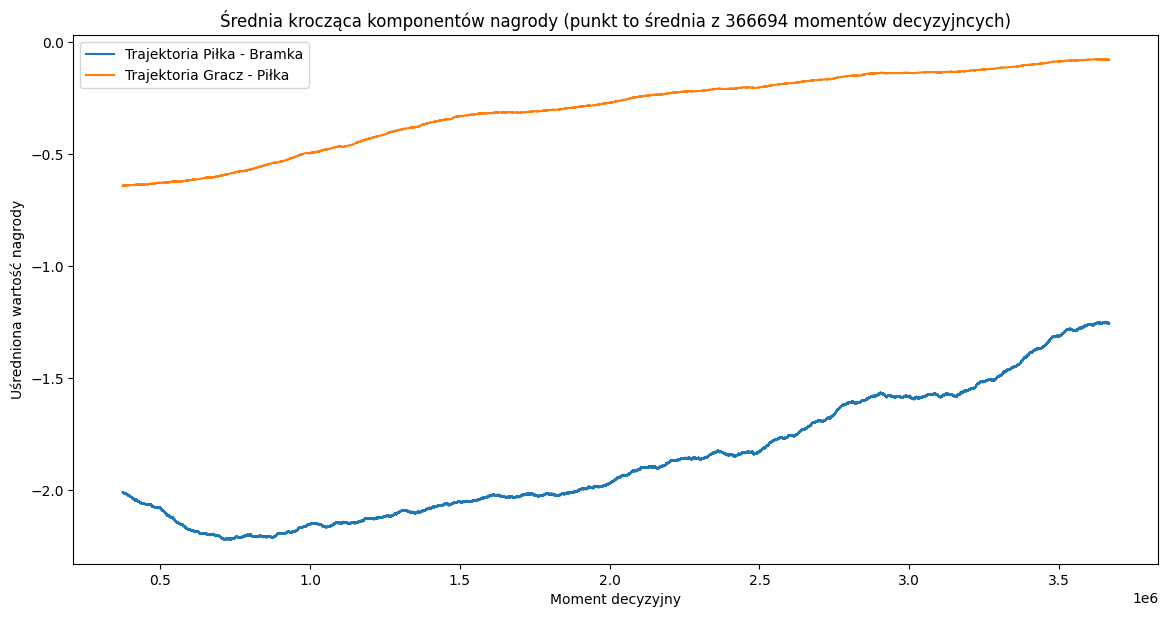

In [11]:
data = experiences[["ballGateTraj", "toBallTraj"]]
data = data.dropna()
roll = data.rolling(window=int(groupSize)).mean()
rewplt = roll.plot(title=f"Średnia krocząca komponentów nagrody (punkt to średnia z {round(groupSize)} momentów decyzyjncych)", xlabel="Moment decyzyjny", ylabel=f"Uśredniona wartość nagrody")
legend=rewplt.legend()
legend.get_texts()[0].set_text('Trajektoria Piłka - Bramka')
legend.get_texts()[1].set_text('Trajektoria Gracz - Piłka')
print(roll.max())

76588
0    43.550927
dtype: float64


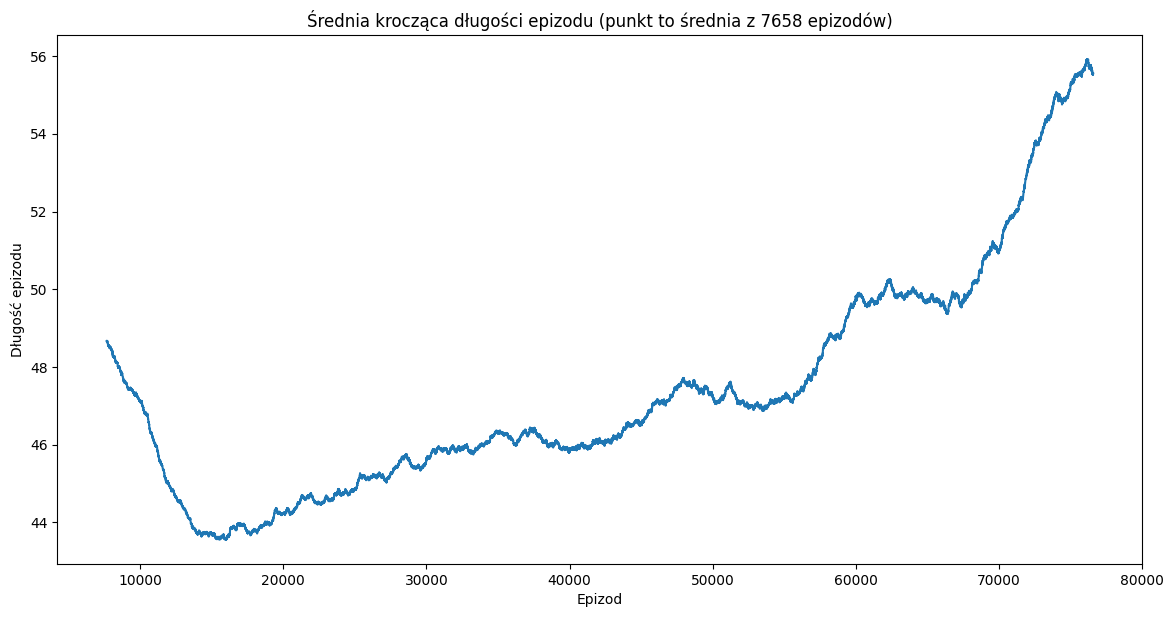

In [12]:
episodeLengths = []
currentEpisodeLength = 1
for row in experiences.itertuples():
    if row.done:
        episodeLengths.append(currentEpisodeLength)
        currentEpisodeLength = 1
    else:
        currentEpisodeLength += 1
episodeLengths.append(currentEpisodeLength)

episodeLengths = pd.DataFrame(episodeLengths)
roll = episodeLengths.rolling(window=len(episodeLengths)//10).mean()
roll.plot(legend=None, xlabel="Epizod", ylabel="Długość epizodu", title=f"Średnia krocząca długości epizodu (punkt to średnia z {len(episodeLengths)//10} epizodów)")
print(len(episodeLengths))
print(roll.min())